In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import rcParams

In [2]:

# Update plotting parameters
rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'font.size': 12,
    'text.usetex': True,
    'pgf.rcfonts': False,
})

<h>Task 1</h>

Text(0, 0.5, 'Size of convergence step $|\\lambda_i-\\lambda|$')

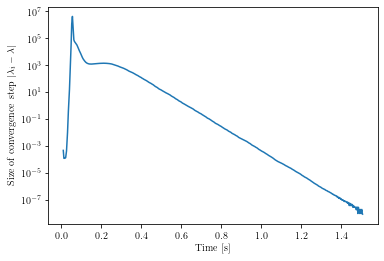

In [12]:
df_task1 = pd.read_csv("./../output/task1_convergence.csv",sep=" ",names=["it","time [us]","lambda"])
df_task1["time [s]"] = df_task1["time [us]"]/1e6
df_task1["err"] = np.abs(df_task1["lambda"]-df_task1["lambda"].iloc[-1])/df_task1["lambda"].iloc[-1]
df_task1["dLambda"]=df_task1["lambda"].diff()

fig, ax = plt.subplots(1,1,figsize=(5.9, 4))
ax.semilogy(df_task1["time [s]"],df_task1["dLambda"])
ax.set_xlabel("Time [s]")
ax.set_ylabel("Size of convergence step $|\lambda_i-\lambda|$")
fig.savefig("./../output/task1_convergence.pdf")

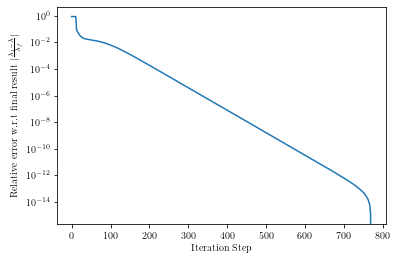

In [17]:
fig, ax = plt.subplots(1,1,figsize=(5.9,4))

ax.semilogy(df_task1["it"],df_task1["err"])
ax.set_xlabel("Iteration Step")
ax.set_ylabel("Relative error w.r.t final result $|\\frac{\lambda_i-\lambda}{\lambda_f}|$")

fig.savefig("./../output/task1_relative_error.pdf")
plt.show()

<h>Task 2</h>

In [29]:
lambda_actual = 9.5986080894852857e3

df_powIt = pd.read_csv("./../output/task2_powerIt_convergence.csv",sep=" ",names=["it","time [us]","lambda"])
df_m30 = pd.read_csv("./../output/task2_lanczos_convergence_m30.csv",sep=" ",names=["it","time [us]","lambda"])
df_m50 = pd.read_csv("./../output/task2_lanczos_convergence_m50.csv",sep=" ",names=["it","time [us]","lambda"])
df_m75 = pd.read_csv("./../output/task2_lanczos_convergence_m75.csv",sep=" ",names=["it","time [us]","lambda"])
df_m100 = pd.read_csv("./../output/task2_lanczos_convergence_m100.csv",sep=" ",names=["it","time [us]","lambda"])

df_powIt["time [s]"] = df_powIt["time [us]"]/1e6
df_m30["time [s]"] = df_m30["time [us]"]/1e6
df_m50["time [s]"] = df_m50["time [us]"]/1e6
df_m75["time [s]"] = df_m75["time [us]"]/1e6
df_m100["time [s]"] = df_m100["time [us]"]/1e6

df_powIt["err"]=np.abs(df_powIt["lambda"]-lambda_actual)/lambda_actual
df_m30["err"]=np.abs(df_m30["lambda"]-lambda_actual)/lambda_actual
df_m50["err"]=np.abs(df_m50["lambda"]-lambda_actual)/lambda_actual
df_m75["err"]=np.abs(df_m75["lambda"]-lambda_actual)/lambda_actual
df_m100["err"]=np.abs(df_m100["lambda"]-lambda_actual)/lambda_actual


df_powIt["dLambda"]=df_powIt["lambda"].diff()
df_m30["dLambda"]=df_m30["lambda"].diff()
df_m50["dLambda"]=df_m50["lambda"].diff()
df_m75["dLambda"]=df_m75["lambda"].diff()
df_m100["dLambda"]=df_m100["lambda"].diff()

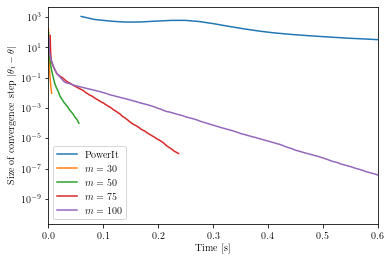

In [30]:
fig, ax = plt.subplots(1,1,figsize=(5.9, 4))
ax.semilogy(df_powIt["time [s]"],df_powIt["dLambda"], label="PowerIt")
ax.semilogy(df_m30["time [s]"],df_m30["dLambda"],label="$m=30$")
ax.semilogy(df_m50["time [s]"],df_m50["dLambda"],label="$m=50$")
ax.semilogy(df_m75["time [s]"],df_m75["dLambda"],label="$m=75$")
ax.semilogy(df_m100["time [s]"],df_m100["dLambda"],label="$m=100$")

ax.legend()
ax.set_xlim([0,0.6])
ax.set_xlabel("Time [s]")
ax.set_ylabel("Size of convergence step $|\\theta_i - \\theta|$")

fig.savefig("./../output/task2_lanczos_convergence_time.pdf")
plt.show()

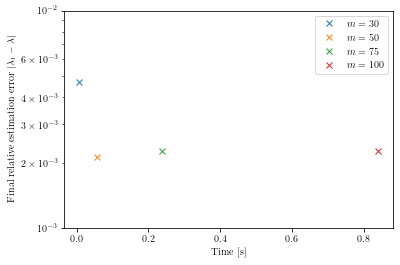

In [32]:
fig, ax = plt.subplots(1,1,figsize=(5.9, 4))

ax.semilogy(df_m30["time [s]"].iloc[-1],df_m30["err"].iloc[-1],"x",label="$m=30$")
ax.semilogy(df_m50["time [s]"].iloc[-1],df_m50["err"].iloc[-1],"x",label="$m=50$")
ax.semilogy(df_m75["time [s]"].iloc[-1],df_m75["err"].iloc[-1],"x",label="$m=75$")
ax.semilogy(df_m100["time [s]"].iloc[-1],df_m100["err"].iloc[-1],"x",label="$m=100$")

ax.legend()
ax.set_ylim([10e-4,10e-3])
ax.set_xlabel("Time [s]")
ax.set_ylabel("Final relative estimation error $|\lambda_i - \lambda|$")

fig.savefig("./../output/task2_lanczos_actual_err.pdf")
plt.show()